In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

Linear regression model
Price of the house example for the coursera course

In [2]:
x_train=np.array([1.0,2.0]) #x_tarin is the input variable
y_train=np.array([300.0,500.0]) #y_train is the output variable

**Number of training examples m**

You will use m to denote the number of training examples. Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension. x_train.shape[0] is the length of the array and number of examples as shown below.


In [3]:
#m is the training example
print(x_train.shape)
m=x_train.shape[0]
print(m)

# we can use the len function for the size of the dataset
print(len(x_train))

(2,)
2
2


**Training example x_i, y_i**

You will use (x (𝑖)
 , y (𝑖)
 ) to denote the  𝑖𝑡ℎ
  training example. Since Python is zero indexed, (x (0)
 , y (0)
 ) is (1.0, 300.0) and (x (1)
 , y (1)
 ) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of x_train is x_train[0]. Run the next code block below to get the  𝑖𝑡ℎ
  training example

In [4]:
i=0
x_i=x_train[i]
y_i=y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plotting the data


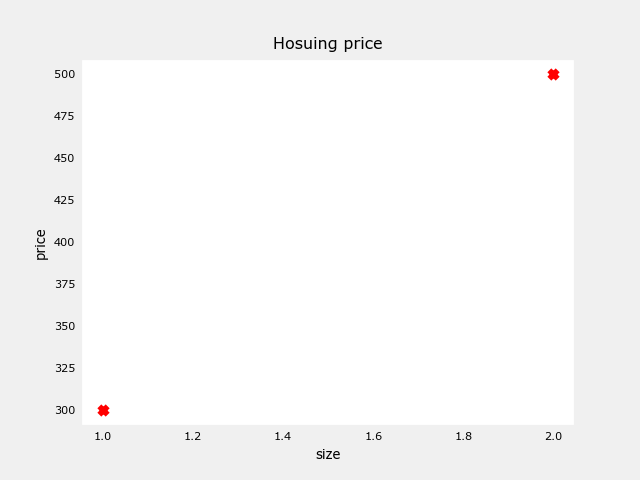

In [5]:
#plotting the scatter plots
plt.scatter(x_train,y_train,marker='x',color='r')
plt.title("Hosuing price")
plt.xlabel("size")
plt.ylabel("price")
plt.show()

### Model function

As described in lecture, the model function for linear regression (which is a function that maps from x to y) is represented as

### 𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏(1)

The formula above is how you can represent straight lines - different values of  𝑤
  and  𝑏
  give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with  𝑤=100 and b=100
 

In [6]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [7]:
def compute_model_output(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

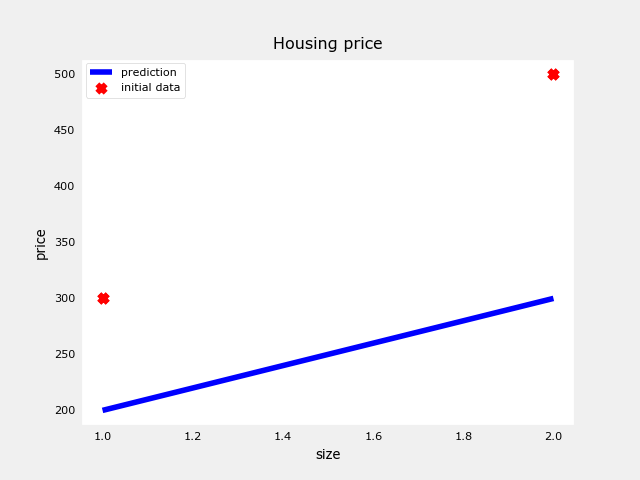

In [8]:
#call the function
temp=compute_model_output(x_train,w,b)

#plot the model prediction
plt.plot(x_train,temp,c='b',label="prediction")

#plot the original points
plt.scatter(x_train,y_train,marker='x',c='r',label="initial data")
plt.title("Housing price")
plt.legend()
plt.xlabel("size")
plt.ylabel("price")
plt.show()

In the above graph we can see that the linear graph is not matching with the original data points
we can use trail and error method and find the values of w and b

### Cost Function


The cost function is used to identify how well the model is predicting the data

In [9]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [10]:
def compute_cost_fun(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost_sum=(f_wb-y[i])**2
        cost=cost+cost_sum
    total_cost=(1/2*m)*cost
    return total_cost

In [11]:
cost_temp=compute_cost_fun(x_train,y_train,w,b)
print(cost_temp)

573600.0


In [12]:
#plot the cost function curve 
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

By adjusting the values of the w keepin b as costant we can got the value of w where there will be minimum value of cost function

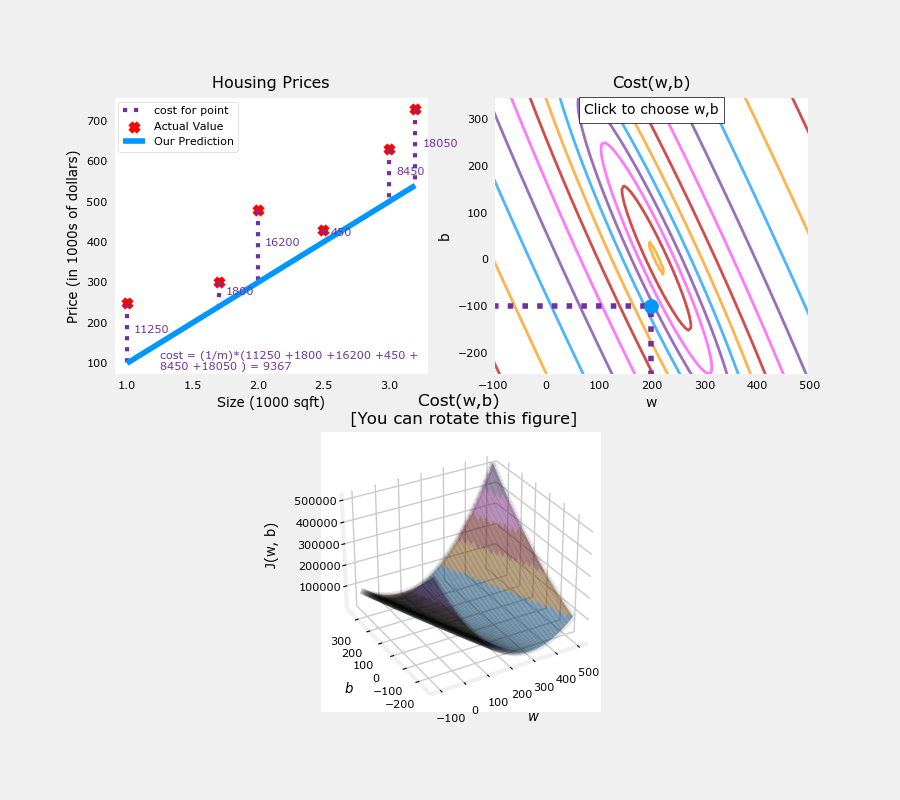

In [13]:
plt.close('all') #clearing all the figures and plotting the new figures
fig,ax,dyn_item=plt_stationary(x_train,y_train)
updater=plt_update_onclick(fig,ax,x_train,y_train,dyn_item)

By using the cost function we can figure out the values of w and b 
we did two steps one is by keeping fixed value of b and the other one is by varying two parameters

### Gradient Descent

Optimizing the values of w and b using gradient descent

In [14]:
import math
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [15]:
def compute_gradient_descent(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dw=(f_wb-y[i])*x[i]
        db=f_wb-y[i]
        dj_dw+=dw
        dj_db+=db
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db
    

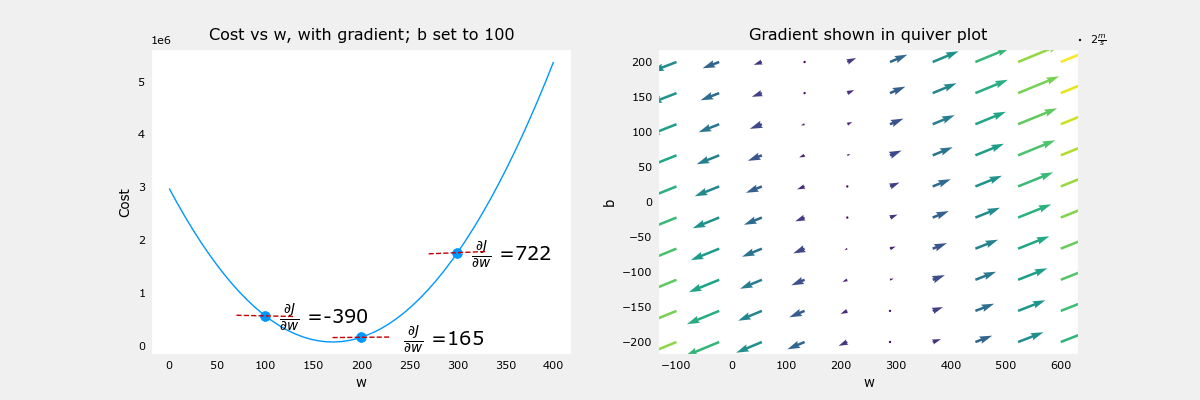

In [16]:
plt_gradients(x_train,y_train, compute_cost_fun, compute_gradient_descent)
plt.show()

In [17]:
def gradient_descent(x,y,w_in,b_in,alpha,iters,compute_cost_fun,compute_gradient_descent):
    m=x.shape[0]
    w=w_in
    b=b_in
    #creating two arrays for storing the values of w and b and see how the values are changing accroding to the iterators
    cost_fun=[]
    parameters=[]
    
    #running a loop till the number of iterators
    for i in range(iters):
        dw,db=compute_gradient_descent(x,y,w,b)
        b=b-alpha*db
        w=w-alpha*dw
        
        if i<100000:
            cost_fun.append(compute_cost_fun(x,y,w,b))
            parameters.append([w,b])
            
        #now we can print the intervals values for more visualization
        if i%math.ceil(iters/10)==0:
            print(f"Iteration {i:4}: Cost {cost_fun[-1]:0.2e} ",
                  f"dj_dw: {dw: 0.3e}, dj_db: {db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,cost_fun,parameters

In [18]:
#initial values of parameters
w_in=0
b_in=0

#gradient valeus
iters=100000
alpha=1e-2

w_final,b_final,cost_hist,para_hist=gradient_descent(x_train,y_train,w_in,b_in,alpha,iters,compute_cost_fun,compute_gradient_descent)

Iteration    0: Cost 3.94e+06  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 10000: Cost 6.25e+04  dj_dw: -3.542e-04, dj_db:  8.682e-04   w:  2.094e+02, b: 2.43254e+00
Iteration 20000: Cost 6.25e+04  dj_dw: -4.861e-08, dj_db:  1.192e-07   w:  2.094e+02, b: 2.42278e+00
Iteration 30000: Cost 6.25e+04  dj_dw: -7.077e-12, dj_db:  1.632e-11   w:  2.094e+02, b: 2.42278e+00
Iteration 40000: Cost 6.25e+04  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 50000: Cost 6.25e+04  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 60000: Cost 6.25e+04  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 70000: Cost 6.25e+04  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 80000: Cost 6.25e+04  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 90000: Cost 6.25e+04  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.4

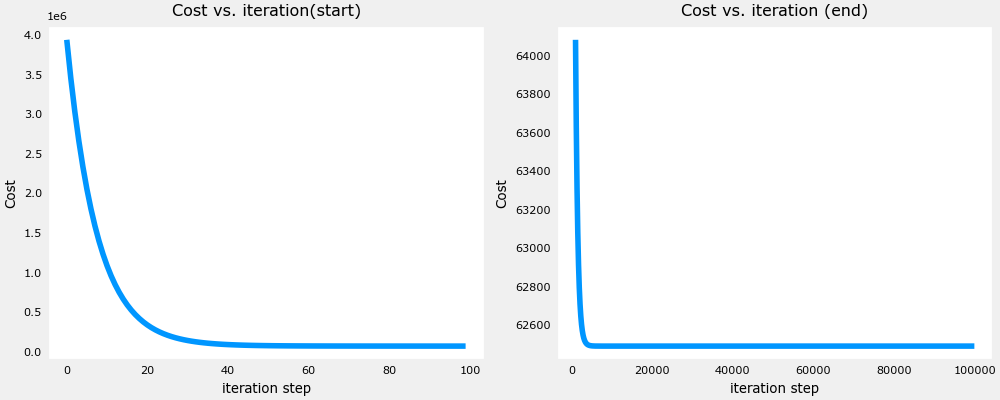

In [19]:
#now lets plot the values of cost along with the iterators, so that we can see how the cost values are changing with respect to iterator
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

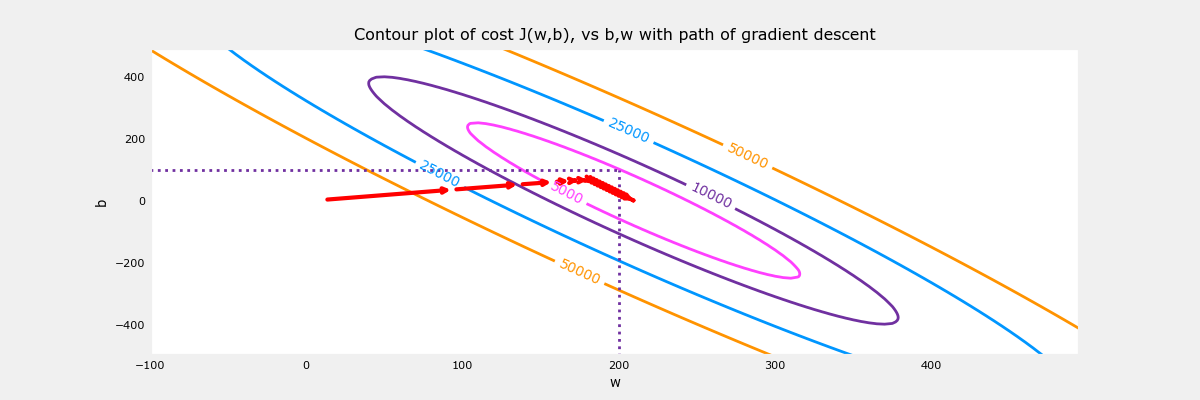

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, para_hist, ax)

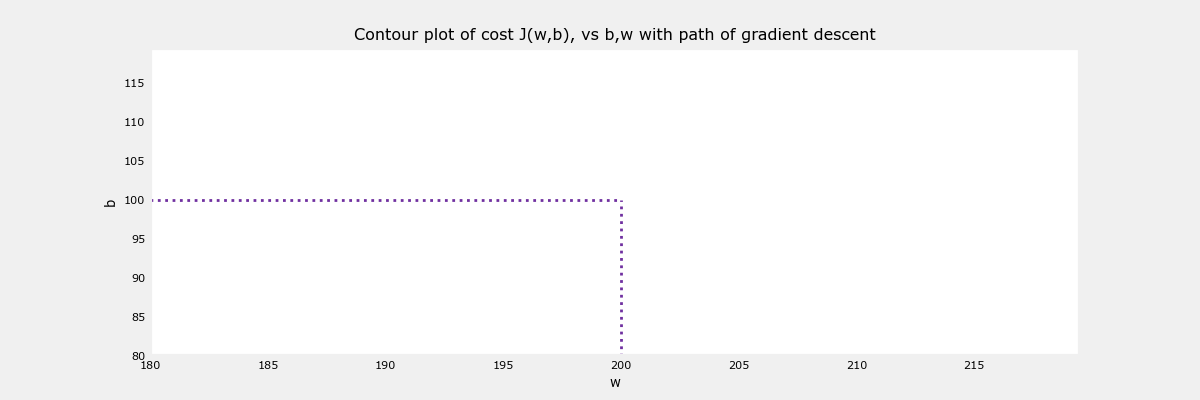

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, para_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],contours=[1,5,10,20],resolution=0.5)